# Imports

In [2]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 78.6 MB/s eta 0:00:00:00:010:01


In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from pymorphy3 import MorphAnalyzer
import pymorphy3
import json


In [3]:

with open("/kaggle/input/vkr-data/diary_entries_final (1).json", "r", encoding="utf-8") as file:
    data = json.load(file)

In [4]:
def remove_old_keys(json_data):
    """Удаляет из JSON все ключи, которые меньше 1900"""
    return {key: value for key, value in json_data.items() if int(key) >= 1900}

filtered_data = remove_old_keys(data)


In [5]:
rows = []
for year, texts in filtered_data.items():
    for text in texts:
        rows.append({"year": int(year), "text": text})

df = pd.DataFrame(rows)



In [6]:
df

,year,text
0,1900,"<p>[Москва]<com id=""15215756731490""/> </p><p>..."
1,1900,"Март, после 16-го, 1900\n«У Горького, — говори..."
2,1900,"30–31 марта 1900\nЕсли моя жена нечестная, неп..."
3,1900,6 апреля 1900\nДорн в «Чайке» говорит: «Что-то...
4,1900,"Май 1900\nА.П. Чехов говорит, что Анна Василье..."
...,...,...
19138,2005,<p>По «Свободе» в своей программе Шендерович д...
19139,2005,"<p>Фет, которого перечитывал три недели назад,..."
19140,2005,"<p>По «Свободе» сказали, что Томас Манн был го..."
19141,2005,<p>Как влиятельно все же массовое искусство. П...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19143 entries, 0 to 19142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    19143 non-null  int64 
 1   text    19143 non-null  object
dtypes: int64(1), object(1)
memory usage: 299.2+ KB


In [8]:
df["decade"] = (df["year"] // 10) * 10
decade_counts = df["decade"].value_counts().sort_index()
decade_counts


decade
1900    1956
1910    2669
1920     961
1930    2091
1940    4338
1950     772
1960    2071
1970    1729
1980    1787
1990     566
2000     203
Name: count, dtype: int64

In [8]:
df

,year,text,decade
0,1900,"<p>[Москва]<com id=""15215756731490""/> </p><p>...",1900
1,1900,"Март, после 16-го, 1900\n«У Горького, — говори...",1900
2,1900,"30–31 марта 1900\nЕсли моя жена нечестная, неп...",1900
3,1900,6 апреля 1900\nДорн в «Чайке» говорит: «Что-то...,1900
4,1900,"Май 1900\nА.П. Чехов говорит, что Анна Василье...",1900
...,...,...,...
19138,2005,<p>По «Свободе» в своей программе Шендерович д...,2000
19139,2005,"<p>Фет, которого перечитывал три недели назад,...",2000
19140,2005,"<p>По «Свободе» сказали, что Томас Манн был го...",2000
19141,2005,<p>Как влиятельно все же массовое искусство. П...,2000


# Register analysis

In [9]:
df_filtered_copy = df.copy()

In [10]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
morph = MorphAnalyzer()
russian_stopwords = stopwords.words('russian') + ['это', 'весь', 'который']

def preprocess(text):
    # Удаление специальных символов и чисел
    text = re.sub(r'[^а-яёА-ЯЁ]', ' ', text.lower())
    
    # Токенизация и лемматизация
    tokens = [morph.parse(word)[0].normal_form 
             for word in text.split() 
             if len(word) > 2 
             and word not in russian_stopwords]
    
    return tokens

df_filtered_copy['processed'] = df_filtered_copy['text'].apply(preprocess)
df_filtered_copy

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,year,text,decade,processed
0,1900,"<p>[Москва]<com id=""15215756731490""/> </p><p>...",1900,"[москва, папа, характер, очень, неприятный, че..."
1,1900,"Март, после 16-го, 1900\n«У Горького, — говори...",1900,"[март, горький, говорить, толстой, свой, чехов..."
2,1900,"30–31 марта 1900\nЕсли моя жена нечестная, неп...",1900,"[март, жена, нечестный, непорядочный, женщина,..."
3,1900,6 апреля 1900\nДорн в «Чайке» говорит: «Что-то...,1900,"[апрель, дорн, чайка, говорить, мыслить, образ..."
4,1900,"Май 1900\nА.П. Чехов говорит, что Анна Василье...",1900,"[май, чехов, говорить, анна, василиевич, фальш..."
...,...,...,...,...
19138,2005,<p>По «Свободе» в своей программе Шендерович д...,2000,"[свобода, свой, программа, шендерович, дважды,..."
19139,2005,"<p>Фет, которого перечитывал три недели назад,...",2000,"[фет, который, перечитывать, неделя, назад, тю..."
19140,2005,"<p>По «Свободе» сказали, что Томас Манн был го...",2000,"[свобода, сказать, томас, манна, гордый, недос..."
19141,2005,<p>Как влиятельно все же массовое искусство. П...,2000,"[влиятельный, массовый, искусство, радио, росс..."


In [12]:
from gensim import corpora, models
import pyLDAvis.gensim_models

# Создание словаря и корпуса
dictionary = corpora.Dictionary(df_filtered_copy['processed'])
corpus = [dictionary.doc2bow(text) for text in df_filtered_copy['processed']]

# Обучение LDA модели
lda_model = models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=15,  # Экспериментируйте с количеством тем
    passes=10,
    alpha='auto'
)

# Визуализация
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

In [39]:
from gensim.models import CoherenceModel

# Расчет когерентности
coherence_model = CoherenceModel(
    model=lda_model,
    texts=df_filtered_copy['processed'],
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print(f"Coherence Score (C_v): {coherence_score:.3f}")

Coherence Score (C_v): 0.508


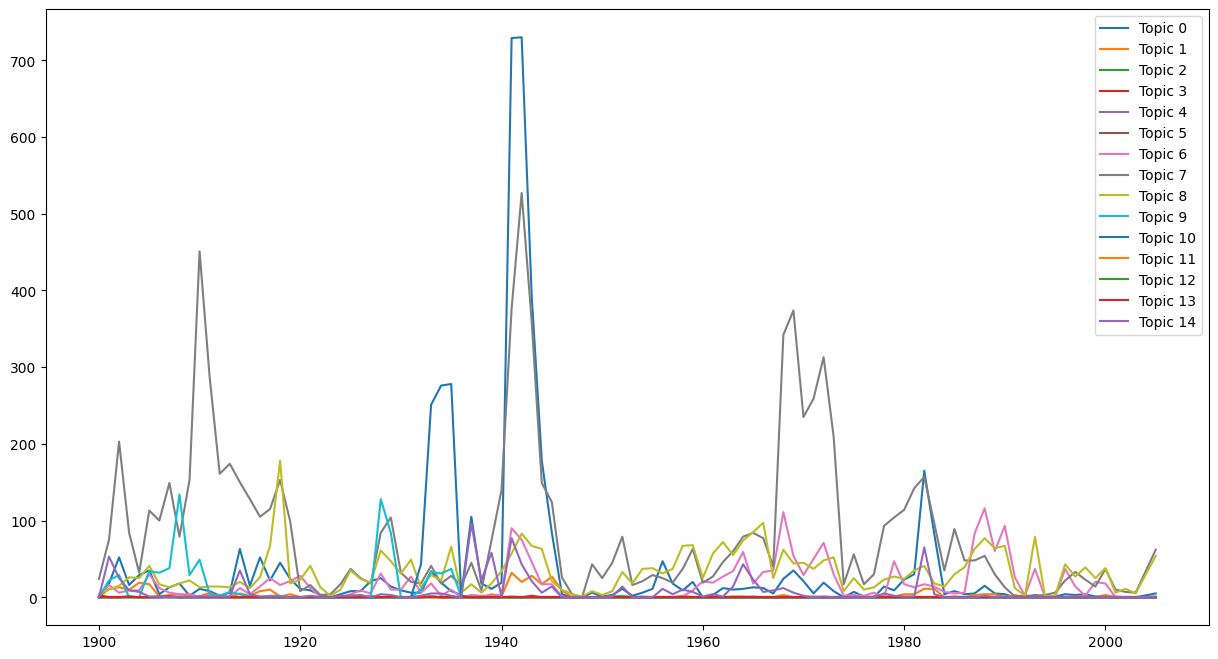

In [40]:
from collections import defaultdict

# Создание временных срезов
yearly_topics = defaultdict(list)
for year, text in zip(df_filtered_copy['year'], df_filtered_copy['processed']):
    bow = dictionary.doc2bow(text)
    topics = lda_model.get_document_topics(bow)
    yearly_topics[year].extend([t[0] for t in topics if t[1] > 0.3])

# Визуализация трендов
plt.figure(figsize=(15, 8))
for topic_id in range(15):
    counts = [len([t for t in yearly_topics[year] if t == topic_id]) 
             for year in sorted(yearly_topics)]
    plt.plot(sorted(yearly_topics), counts, label=f"Topic {topic_id}")

plt.legend()
plt.show()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Создание TF-IDF матрицы
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df_filtered_copy['processed'].apply(' '.join))

# Топ-20 значимых слов
feature_names = tfidf.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1
top_words = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)[:50]

print("Топ-20 ключевых слов:")
for word, score in top_words:
    print(f"{word}: {score:.2f}")

Топ-20 ключевых слов:
день: 744.67
очень: 576.89
наш: 547.76
свой: 522.66
сегодня: 491.63
человек: 456.61
мой: 451.12
год: 437.63
дом: 436.28
который: 432.47
говорить: 421.10
ходить: 393.38
сказать: 388.61
лев: 381.60
время: 375.30
вечером: 365.82
один: 363.10
письмо: 354.56
час: 353.70
дима: 350.47
читать: 342.46
писать: 338.21
хозяйка: 338.14
жизнь: 331.38
марья: 327.89
вчера: 326.54
идти: 324.52
приехать: 321.90
мы: 319.83
дело: 316.14
такой: 313.32
москва: 309.98
работа: 305.46
новый: 300.23
стать: 295.76
фигурант: 288.85
хороший: 285.71
первый: 280.15
митрий: 278.01
мочь: 271.62
знать: 270.68
весь: 265.18
делать: 262.34
николаевич: 260.41
утро: 256.79
вечер: 256.46
получить: 254.35
какой: 242.73
хотеть: 241.96
утром: 240.29


In [18]:
!pip install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 53.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 105.4 MB/s eta 0:00:0000:0100:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=45e9ae412742a03f69b2abac6216eb9a687ea75036bf49da4bbe3628064a23db
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=a611bb7fddf6f6890df1a8970e8adb1c9f33b1d347bac1afc84266ad233bbb8c
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built docopt intervaltree


In [23]:
from natasha import (
    Doc,
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsNERTagger
)

# Инициализация компонентов
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
ner_tagger = NewsNERTagger(emb)

def extract_entities(text):
    # Создаем объект Doc
    doc = Doc(text)
    
    # Последовательная обработка
    doc.segment(segmenter)       # Сегментация на токены
    doc.tag_morph(morph_tagger)  # Морфологический разбор
    doc.tag_ner(ner_tagger)      # Извлечение сущностей
    
    # Нормализация и сбор результатов
    entities = []
    for span in doc.spans:
        span.normalize(morph_vocab)  # Приводим к нормальной форме
        entities.append(
            (span.normal, span.type)
        )
    
    return entities

# Применяем функцию к данным
df_filtered_copy['entities'] = df_filtered_copy['text'].apply(extract_entities)

# Извлекаем все сущности
all_entities = [ent for sublist in df_filtered_copy['entities'] for ent in sublist]

# Фильтруем персоны и локации
persons = [ent[0] for ent in all_entities if ent[1] == 'PER']
locations = [ent[0] for ent in all_entities if ent[1] == 'LOC']

print("Топ-10 персон:", Counter(persons).most_common(10))
print("Топ-10 локаций:", Counter(locations).most_common(10))

Топ-10 персон: [('Дима', 4246), ('Лев Николаевич', 1324), ('Брежнев', 840), ('Чертков', 761), ('Таня', 717), ('Л. Н.', 669), ('Мишка', 668), ('Сталин', 566), ('Ельцин', 566), ('Эдик', 528)]
Топ-10 локаций: [('Москва', 3118), ('Россия', 1124), ('Ленинград', 877), ('СССР', 636), ('Чехословакия', 573), ('Земля', 551), ('Киев', 394), ('Германия', 391), ('Афганистан', 362), ('Украина', 346)]


In [29]:
from razdel import sentenize

def extract_questions(text):
    """Извлекает предложения с вопросами из текста"""
    return [
        sentence.text.strip() 
        for sentence in sentenize(text) 
        if sentence.text.strip().endswith('?')
    ]

# Создаем список словарей с вопросами и исходными текстами
result = []
for _, row in df_filtered_copy.iterrows():
    questions = extract_questions(row['text'])
    for question in questions:
        result.append({
            'original_text': row['text'],
            'question': question,
            'year': row.get('year', None)  # если есть год
        })

# Создаем новый DataFrame
questions_df = pd.DataFrame(result)

# Просмотр результатов
print(f"Найдено вопросов: {len(questions_df)}")
questions_df.head(1005) 

Найдено вопросов: 7405


,original_text,question,year
0,6 апреля 1900\nДорн в «Чайке» говорит: «Что-то...,Что-то есть?,1900
1,Январь1900г.\n...Все Н. и Н. Наши отношения вс...,"По-видимому, она уверена в себе, а потому в эт...",1900
2,<p>Последний день грустного года! Что-то прине...,Что-то принесет новый?,1900
3,<p>Последний день грустного года! Что-то прине...,Счастлива ли она?,1900
4,<p>Почти год не писала дневника. Пересчитывать...,"К чему-то проснешься, — к новым ли радостям, к...",1900
...,...,...,...
1000,"<p>6 ч. утра. Производство общеполезных вещей,...",Но кто же пользуется этими свечами и спичками?,1918
1001,"<p>6 ч. утра. Производство общеполезных вещей,...",Да так ли?,1918
1002,"<p>6 ч. утра. Производство общеполезных вещей,...",Правда ли?,1918
1003,"<p>6 ч. утра. Производство общеполезных вещей,...","А когда удается, то не должны ли мы, посторонн...",1918


# Linguistic features extraction

In [13]:
df_ling = df.copy()

In [14]:
df_ling["text"] = df_ling["text"].str.replace(r'\n|\t|\r|</p>|<p>', ' ', regex=True)

df_ling


,year,text,decade
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900
...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000
19141,2005,Как влиятельно все же массовое искусство. По ...,2000


In [15]:

# Словарь для хранения DataFrame
decade_dfs = {}

# Группировка и сохранение
for decade, group in df_ling.groupby('decade'):
    decade_dfs[decade] = group[["text", "year"]].copy()

    # Вывод информации
    print(f"\nДекада {decade}-{decade+9} ({len(decade_dfs[decade])} записей)")


Декада 1900-1909 (1956 записей)

Декада 1910-1919 (2669 записей)

Декада 1920-1929 (961 записей)

Декада 1930-1939 (2091 записей)

Декада 1940-1949 (4338 записей)

Декада 1950-1959 (772 записей)

Декада 1960-1969 (2071 записей)

Декада 1970-1979 (1729 записей)

Декада 1980-1989 (1787 записей)

Декада 1990-1999 (566 записей)

Декада 2000-2009 (203 записей)


In [13]:
decade_dfs[1900]

,text,year
0,"[Москва]<com id=""15215756731490""/> У папá...",1900
1,"Март, после 16-го, 1900 «У Горького, — говорил...",1900
2,"30–31 марта 1900 Если моя жена нечестная, непо...",1900
3,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900
4,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900
...,...,...
1951,"Все в Москве, и покупки к праздникам. Вечером...",1909
1952,Разговор с А. С. Л[аппо]-Данил[евским]. Петр ...,1909
1953,Продолжение разговора. Каталог книг Андрея Ви...,1909
1954,Лето 1909 (с 10 мая). <h3>Заметки.</h3> 1...,1909


In [17]:
!python -m spacy download ru_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 3.3 MB/s eta 0:00:000:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.6 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [19]:
!nvcc --version
!pip install cupy-cuda12x

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [31]:
import stanza
import spacy
import cupy

# Инициализация моделей
if cupy.is_available():
    print("GPU доступен")
    spacy.prefer_gpu()
nlp_spacy = spacy.load("ru_core_news_lg")
stanza.download('ru')
nlp_stanza = stanza.Pipeline('ru', use_gpu=True)


GPU доступен


In [32]:
indef_list = {'некто', 'нечто', 'некоторый', 'несколько', 'некий', 'кое-кто', "кое-что", "кое-какой", "кое-чей", "кто-то", "что-то", "какой-то", "чей-то", "кто-нибудь", "что-нибудь", "какой-нибудь", "чей-нибудь", "кто-либо", "что-либо", "какой-либо", "чей-либо"}

place_adv_list = {'вблизи',
                  'вверху',
                  'вдалеке',
                  'вдали',
                  'взаперти',
                  'вне',
                  'внизу',
                  'внутри',
                  'вовне',
                  'возле',
                  'вокруг',
                  'впереди',
                  'всюду',
                  'высоко',
                  'где',
                  'далеко',
                  'далёко',
                  'изнутри',
                  'навстречу',
                  'наособицу',
                  'невдалеке',
                  'недалеко',
                  'недалечко',
                  'неподалёку',
                  'низом',
                  'одаль',
                  'одесную',
                  'около',
                  'окрест',
                  'откуда',
                  'отсюда',
                  'передом',
                  'поблизости',
                  'повсюду',
                  'поодаль',
                  'посередине',
                  'посерёдке',
                  'посреди',
                  'посредине',
                  'прочь',
                  'рядом',
                  'сверху',
                  'сзади',
                  'слева',
                  'снаружи',
                  'снизу',
                  'спереди',
                  'справа',
                  'там',
                  'вверх',
                  'вниз',
                  'доселе',
                  'досель',
                  'дотуда',
                  'дотудова',
                  'изовсюду',
                  'кое-куда',
                  'кое-откуда',
                  'кой-куда',
                  'куда',
                  'куда угодно',
                  'куда-либо',
                  'куда-нибудь',
                  'куда-то',
                  'никуда',
                  'нигде',
                  'отколь',
                  'откуда',
                  'откуда-либо',
                  'откуда-то',
                  'откудова',
                  'отовсюду',
                  'отселе',
                  'отсель',
                  'отсюда',
                  'отсюдова',
                  'отсюду',
                  'оттелева',
                  'оттель',
                  'оттоль',
                  'оттуда',
                  'оттудова',
                  'сюда',
                  'туда',
                  'тут',
                  'туда-обратно',
                  'туда-сюда'
                  }

time_adv_list = {
'анадысь',
'ввек',
'вдалеке',
'вдали',
'весной',
'весною',
'вечером',
'вечор',
'вовремя',
'впоследствии',
'впредь',
'встарь',
'вчера',
'вчерась',
'давеча',
'давно',
'дальше',
'днём',
'днесь',
'днями',
'доднесь',
'долго',
'доле',
'долее',
'доныне',
'досветла',
'дотемна',
'древле',
'ежедневно',
'ежеквартально',
'ежемесячно',
'еженочно',
'еженощно',
'заблаговременно',
'завременно',
'завтра',
'задолго',
'зараз',
'заранее',
'засветло',
'засим',
'затем',
'затемно',
'зимой',
'зимою',
'издревле',
'иногда',
'испокон',
'каждодневно',
'каждомесячно',
'когда-либо',
'летом',
'навсегда',
'надолго',
'надысь',
'накануне',
'намедни',
'насовсем',
'наутро',
'невовремя',
'недавно',
'незадолго',
'несвоевременно',
'нонеча',
'нонче',
'ночию',
'ночью',
'ныне',
'нынече',
'нынче',
'однажды',
'отныне'
'первоначально',
'поднесь',
'подоле',
'подчас',
'позднее',
'поздно',
'позже',
'пока',
'покамест',
'покуда',
'поначалу',
'поныне',
'порой',
'после'
'послезавтра',
'прежде',
'ранее',
'рано',
'раньше',
'редко',
'сегодня',
'сейгод',
'сейчас',
'скоро',
'смальства',
'смолоду',
'сперва',
'спокон',
'сразу',
'стемна',
'сыздетства',
'сызмала',
'сызмалу',
'сызмальства',
'теперича',
'теперь',
'третёвось',
'третьёвось',
'утром',
'часто',
'ща',
'щас'
}

In [21]:
# Загрузка данных 
abstraction_df_noun = pd.read_csv('/kaggle/input/vkr-data/Slovar.r.ya..s.indeksom.konkretnosti.slov.csv')
abstraction_df_adj = pd.read_csv ('/kaggle/input/vkr-data/Slovar.r.ya..s.indeksom.konkretnosti.slov_.csv')


In [19]:
abstraction_df_noun

,word,score,Индекс С/A
0,туфельки,35.0000,4.555348
1,шаровары,35.0000,4.555348
2,сапожки,32.0000,4.465736
3,горсовета,31.0000,4.433987
4,плащи,31.0000,4.433987
...,...,...,...
63946,явление,0.0029,-4.843045
63947,утверждение,0.0029,-4.843045
63948,необходимость,0.0028,-4.878136
63949,признание,0.0028,-4.878136


In [20]:
abstraction_df_adj

,w,score,Индекс С/A
0,новенький,76.0000,5.330733
1,кожаная,60.0000,5.094345
2,самодельный,49.0000,4.891820
3,шерстяной,49.0000,4.891820
4,тоненькая,46.0000,4.828641
...,...,...,...
23875,необыкновенную,0.0089,-3.721704
23876,социальную,0.0084,-3.779524
23877,радостное,0.0074,-3.906275
23878,исключительную,0.0072,-3.933674


In [22]:
def normalize_noun(word):
    """Нормализация существительных с обработкой исключений"""
    try:
        parsed = morph.parse(str(word))[0]
        if 'NOUN' in parsed.tag:
            return parsed.normal_form.lower().strip()
        return str(word).lower().strip()
    except:
        return str(word).lower().strip()

def normalize_adj(word):
    """Нормализация прилагательных с обработкой исключений"""
    try:
        parsed = morph.parse(str(word))[0]
        if 'ADJF' in parsed.tag:
            return parsed.normal_form.lower().strip()
        return str(word).lower().strip()
    except:
        return str(word).lower().strip()

# Обработка существительных
normalized_dict_noun = defaultdict(list)

for raw_word, score in zip(abstraction_df_noun['word'], abstraction_df_noun['Индекс С/A']):
    normalized = normalize_noun(raw_word)
    normalized_dict_noun[normalized].append(float(score))  # Конвертация в float

abstraction_dict_noun = {}
for lemma, scores in normalized_dict_noun.items():
    abstraction_dict_noun[lemma] = sum(scores) / len(scores)  # Ручной расчет среднего

print({k: v for k, v in list(abstraction_dict_noun.items())[:5]})

# Обработка прилагательных
abstraction_df_adj = abstraction_df_adj.copy()
abstraction_df_adj['Индекс С/A'] = abstraction_df_adj['Индекс С/A'].astype(float)
abstraction_df_adj['normalized'] = abstraction_df_adj['w'].apply(normalize_adj)

abstraction_dict_adj = (
    abstraction_df_adj
    .groupby('normalized')['Индекс С/A']
    .mean()
    .to_dict()
)

print({k: float(v) for k, v in list(abstraction_dict_adj.items())[:5]})


{'туфелька': 2.5299385246000003, 'шаровары': 3.2013158180000003, 'сапожок': 2.40869740075, 'горсовет': 2.716993602, 'плащ': 2.1715183975000003}
{'абиссинская': 1.693147181, 'абиссинский': 0.306852819, 'абонементный': 1.0, 'абордажные': 1.0, 'абразивная': 1.223143551}


In [26]:
import re
# Предварительная настройка
dim_patterns = [re.compile(rf'({s})[а-я]*$') for s in [
    'ик', 'ек', 'к', 'ок', 'ёк', 'ец', 'иц',
    'очк', 'ечк', 'оньк', 'еньк', 'ышк', 'ишк', 'ушк', 'юшк'
]]

In [33]:
from collections import deque
class RussianTextAnalyzer:
    def __init__(self, text):
        self.text = text
        self.text_len = len(text)
        self.spacy_doc = nlp_spacy(text)
        self.stanza_doc = nlp_stanza(text)
        self.words = [token.text for token in self.spacy_doc if not token.is_punct]
        self.abstraction_dict_noun = {k: float(v) for k, v in abstraction_dict_noun.items()}
        self.abstraction_dict_adj = {k: float(v) for k, v in abstraction_dict_adj.items()}

        # Инициализируем счетчики
        self.features = {}

    def analyze(self):
        self._lexical_features()
        self._syntactic_features()
        self._morphological_features()
        return self.features

    def _lexical_features(self):
        # Лексические признаки
        pos_counts = Counter(token.pos_ for token in self.spacy_doc)
        # morph_features_count = Counter(token.morph.to_dict() for token in self.spacy_doc)

        gram_spacy = {}
        for token in self.spacy_doc:
          if token.pos_ not in gram_spacy:
            gram_spacy[token.pos_] = Counter(token.morph.to_dict().values())
          else:
            gram_spacy[token.pos_] += Counter(token.morph.to_dict().values())

        gram_stanza = {}
        for sent in self.stanza_doc.sentences:
          for word in sent.words:
            if word.upos not in gram_stanza:
              gram_stanza[word.upos] = Counter(dict(item.split('=') for item in word.feats.split('|')).values() if word.feats else {})
            else:
              gram_stanza[word.upos] += Counter(dict(item.split('=') for item in word.feats.split('|')).values() if word.feats else {})



        def analyze_abstr():
            upos_lemmas = [
                (word.upos, word.lemma.lower().strip())
                for sent in self.stanza_doc.sentences
                for word in sent.words
            ]

            scores_noun = []
            scores_adj = []
            total_nouns = 0
            total_adj = 0

            for upos, lemma in upos_lemmas:
                if upos == 'NOUN':
                    total_nouns += 1
                    if lemma in self.abstraction_dict_noun:
                        scores_noun.append(float(self.abstraction_dict_noun[lemma]))  # Явное преобразование
                if upos == 'ADJ':
                    total_adj += 1
                    if lemma in self.abstraction_dict_adj:
                        scores_adj.append(float(self.abstraction_dict_adj[lemma]))

            # Расчет статистики
            mean_noun = sum(scores_noun)/len(scores_noun) if scores_noun else None
            mean_adj = sum(scores_adj)/len(scores_adj) if scores_adj else None
            sorted_scores_noun = sorted(scores_noun)
            sorted_scores_adj = sorted(scores_adj)
            n_noun = len(sorted_scores_noun)
            n_adj = len(sorted_scores_adj)
            median_noun = (
                sorted_scores_noun[n_noun//2]
                if n_noun % 2 else
                (sorted_scores_noun[n_noun//2-1] + sorted_scores_noun[n_noun//2])/2
            ) if scores_noun else None
            median_adj = (
                sorted_scores_adj[n_adj//2]
                if n_adj % 2 else
                (sorted_scores_adj[n_adj//2-1] + sorted_scores_adj[n_adj//2])/2
            ) if scores_adj else None

            return {
                'mean_score_noun': mean_noun,
                'mean_score_adj': mean_adj,
                'median_score_noun': median_noun,
                'median_score_adj': median_adj,
                'coverage_noun': len(scores_noun)/total_nouns if total_nouns else 0.0,
                'coverage_adj': len(scores_adj)/total_adj if total_adj else 0.0,
                'total_nouns': total_nouns,
                'total_adj': total_adj
            }

        abstr_pos = analyze_abstr()
        self.features.update({
            'first_person_pronouns_sing': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=First' in t.morph
                                                and 'Number=Sing' in t.morph
                                              ),
            'first_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=First' in t.morph
                                                and 'Number=Plur' in t.morph
                                              ),
            'second_person_pronouns_sing': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Second' in t.morph
                                                and 'Number=Sing' in t.morph
                                              ),
            'second_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Second' in t.morph
                                                and 'Number=Plur' in t.morph
                                              ),
            'third_person_pronouns_masc': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Masc' in t.morph
                                              ),
            'third_person_pronouns_fem': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Fem' in t.morph
                                            ),
            'third_person_pronouns_neut': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Gender=Neut' in t.morph
                                             ),
            'third_person_pronouns_plur': sum(
                                                1
                                                for t in self.spacy_doc
                                                if t.pos_ == 'PRON'
                                                and 'Person=Third' in t.morph
                                                and 'Number=Plur' in t.morph
                                             ),
            'demonstrative_pronouns': gram_stanza.get('DET', Counter()).get('Dem',0),
            'prepositions': pos_counts.get('ADP', 0),
            'coordinationg_conjunctions': pos_counts.get('CCONJ', 0),
            'indefinite_pronouns': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in indef_list
                                        and word.upos in {'DET', 'PRON'}
                                    ),
            'place_adverbials': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in place_adv_list
                                        and word.upos in {'ADV'}
                                    ),
            'time_adverbials': sum(
                                        1
                                        for sent in self.stanza_doc.sentences
                                        for word in sent.words
                                        if word.lemma.lower() in time_adv_list
                                        and word.upos in {'ADV'}
                                    ),
            'noun_anim': sum(
                                  1
                                  for t in self.spacy_doc
                                  if t.pos_ == 'NOUN'
                                  and 'Animacy=Anim' in t.morph
                                ),
            'noun_inan': sum(
                              1
                              for t in self.spacy_doc
                              if t.pos_ == 'NOUN'
                              and 'Animacy=Inan' in t.morph
                            ),
            'noun_abstr_index': abstr_pos['mean_score_noun'],
            'adj_abstr_index': abstr_pos['mean_score_adj'],
            'latin_letters': sum(1
                                    for token in self.spacy_doc
                                    if any('LATN' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'propr_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Name' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'patr_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Patr' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'sur_name': sum(1
                                    for token in self.spacy_doc
                                    if any('Surn' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'praedicative': sum(1
                                    for token in self.spacy_doc
                                    if any('PRED' in parse.tag for parse in morph.parse(token.text)) or any('Prdx' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'geo_name': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "PROPN"
                              if any('Geox' in parse.tag for parse in morph.parse(token.text))
                              ),
            'intj': sum(1
                                    for token in self.spacy_doc
                                    if any('INTJ' in parse.tag for parse in morph.parse(token.text))
                                  )
        })


    def _syntactic_features(self):
        # Синтаксические признаки
        sentence_lengths = [len(sent.text.split()) for sent in self.spacy_doc.sents]

        def is_minor_constituent(word, sentence):
            """Определяет тип сочинительной конструкции"""
            if word.head == 0:
                return None

            head = sentence.words[word.head - 1]

            # Определяем тип конструкции
            if word.deprel == 'conj':
                if head.upos == 'NOUN' and word.upos == 'NOUN':
                    return 'NOUN'
                elif head.upos == 'ADJ' and word.upos == 'ADJ':
                    return 'ADJ'
                elif head.upos == 'VERB' and word.upos == 'VERB':
                    return 'VERB'
                elif head.upos == 'ADV' and word.upos == 'ADV':
                    return 'ADV'
                elif head.deprel in {'obj', 'nsubj', 'nmod'}:
                    return 'NOUN'  # Для именных дополнений
                elif head.deprel == 'amod':
                    return 'ADJ'   # Для определений
                elif head.deprel == 'advmod':
                    return 'ADV'   # Для обстоятельств

            return None

        def extract_minor_coordinations(text):
            doc = self.stanza_doc
            coordination_counts = {
                'NOUN': 0,
                'ADJ': 0,
                'VERB': 0,
                'ADV': 0,
                'OTHER': 0
            }

            for sentence in doc.sentences:
                for word in sentence.words:
                    if word.deprel == 'conj':
                        const_type = is_minor_constituent(word, sentence)
                        if const_type:
                            if const_type in coordination_counts:
                                coordination_counts[const_type] += 1
                            else:
                                coordination_counts['OTHER'] += 1

            return coordination_counts

        coordination_counts = extract_minor_coordinations(text)

        def analyze_tree(text):
            doc = self.stanza_doc
            features = {
                'max_tree_depth': 0,
                'avg_np_length': 0.0,
                'avg_vp_length': 0.0,
                'inversion_count': 0,
                'ellipsis_count': 0
            }

            all_depths = []
            np_lengths = []
            vp_lengths = []

            for sentence in doc.sentences:
                # 2.1. Глубина дерева
                depths = _calculate_depths(sentence)
                all_depths.extend(depths)

                # 2.2. Длина NP/VP
                nps = _extract_phrases(sentence, 'NP')
                vps = _extract_phrases(sentence, 'VP')
                np_lengths.extend([len(np) for np in nps])
                vp_lengths.extend([len(vp) for vp in vps])

                # 2.3. Инверсии
                features['inversion_count'] += _count_inversions(sentence)

                # 2.4. Эллипсис
                features['ellipsis_count'] += sum(1 for word in sentence.words
                                                if word.deprel == 'orphan')

            # Расчет итоговых значений
            if all_depths:
                features['max_tree_depth'] = max(all_depths)
            if np_lengths:
                features['avg_np_length'] = sum(np_lengths)/len(np_lengths)
            if vp_lengths:
                features['avg_vp_length'] = sum(vp_lengths)/len(vp_lengths)

            return features

        def _calculate_depths(sentence):
            """Улучшенный расчет глубины дерева с использованием BFS"""
            depths = []
            root = next((word for word in sentence.words if word.head == 0), None)
            if not root:
                return []

            queue = deque([(root, 0)])
            visited = set()

            while queue:
                word, depth = queue.popleft()
                if word.id in visited:
                    continue
                visited.add(word.id)
                depths.append(depth)

                # Добавляем дочерние узлы
                children = [w for w in sentence.words if w.head == word.id]
                for child in children:
                    queue.append((child, depth + 1))

            return depths

        def _extract_phrases(sentence, phrase_type):
            """Улучшенное извлечение фраз с фильтрацией"""
            phrases = []
            targets = {
                'NP': ['NOUN', 'PROPN', 'PRON'],
                'VP': ['VERB', 'AUX']
            }

            for word in sentence.words:
                if word.upos in targets[phrase_type]:
                    phrase = _get_phrase(sentence, word.id)
                    if _is_valid_phrase(phrase_type, sentence, phrase):
                        phrases.append(phrase)

            return phrases

        def _get_phrase(sentence, head_id):
            """Поиск в ширину для более точного определения границ фразы"""
            phrase = []
            queue = deque([head_id])
            visited = set()

            while queue:
                current_id = queue.popleft()
                if current_id in visited:
                    continue
                visited.add(current_id)

                phrase.append(current_id)
                current_word = sentence.words[current_id-1]

                # Добавляем только непосредственные зависимые
                children = [w.id for w in sentence.words
                          if w.head == current_id
                          and w.deprel not in ['punct', 'cc', 'mark']]
                queue.extend(children)

            return sorted(phrase)

        def _is_valid_phrase(phrase_type, sentence, phrase_ids):
            """Проверка валидности извлеченной фразы"""
            if len(phrase_ids) < 1:
                return False

            main_word = sentence.words[phrase_ids[0]-1]

            if phrase_type == 'NP':
                return main_word.upos in ['NOUN', 'PROPN', 'PRON']
            elif phrase_type == 'VP':
                return main_word.upos in ['VERB', 'AUX']
            return False

        def _count_inversions(sentence):
            """Улучшенный подсчет инверсий"""
            inversions = 0
            for word in sentence.words:
                if word.deprel == 'nsubj':
                    verb = sentence.words[word.head-1]
                    # Более гибкое условие для русского языка
                    if word.id > verb.id and (word.id - verb.id) >= 1:
                        context = sentence.words[verb.id-1:word.id]
                        if not any(w.deprel == 'advmod' for w in context):
                            inversions += 1
            return inversions

        tree_analysis = analyze_tree(text)

        def count_syllables_ru(word):
            """Улучшенный подсчет слогов для русского языка"""
            vowels = 'аеёиоуыэюя'
            word = word.lower()
            count = 0
            prev_vowel = False

            for char in word:
                if char in vowels:
                    if not prev_vowel:  # Учитываем только последовательные гласные как один слог
                        count += 1
                    prev_vowel = True
                else:
                    prev_vowel = False

            # Гарантируем минимум 1 слог для коротких слов
            return max(1, count)

        def flesch_kincaid_russian(text):
            
            try:

                # Сбор статистики
                sentences = self.stanza_doc.sentences
                num_sentences = len(sentences)
                words = [word.text for sent in sentences for word in sent.words]
                num_words = len(words)

                if num_sentences == 0 or num_words == 0:
                    return 0.0

                # Подсчет слогов
                total_syllables = sum(count_syllables_ru(word) for word in words)

                # Расчет показателей
                ASL = num_words / num_sentences  # Average Sentence Length
                ASW = total_syllables / num_words  # Average Syllables per Word

                # Применение формулы
                score = 206.835 - 1.52 * ASL - 65.14 * ASW

                # Ограничение диапазона 0-100
                return max(0, min(100, round(score, 2)))

            except Exception as e:
                print(f"Ошибка при обработке текста: {e}")
                return 0.0

        flesch_kincaid_index = flesch_kincaid_russian(self.text)


        self.features.update({
            'mean_sentence_length': sum(sentence_lengths)/len(sentence_lengths) if sentence_lengths else 0,
            'subordinate_clauses': sum(1 for token in self.spacy_doc if token.dep_ == 'mark' or token.pos_ == 'SCONJ'),
            'type-token ratio': len(set(self.words)) / len(self.words) * 100 if self.words else 0,
            'word length': sum(len(word) for word in self.words) / len(self.words),
            'noun_coordination': coordination_counts['NOUN'],
            'adj_coordination': coordination_counts['ADJ'],
            'verb_coordination': coordination_counts['VERB'],
            'adv_coordination': coordination_counts['ADV'],
            'other_coordination': coordination_counts['OTHER'],
            'max_tree_depth': tree_analysis['max_tree_depth'],
            'avg_np_length': tree_analysis['avg_np_length'],
            'avg_vp_length': tree_analysis['avg_vp_length'],
            'inversion_count': tree_analysis['inversion_count'],
            'ellipsis_count': tree_analysis['ellipsis_count'],
            'flesch_kincaid_index': flesch_kincaid_index
        })

    def _morphological_features(self):
        # Морфологические признаки

        self.features.update({
            'perfect_aspect': sum(1 for token in self.spacy_doc if  token.pos_ == 'VERB' and 'Aspect=Perf' in token.morph),
            'imperfect_aspect': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Aspect=Imp' in token.morph),
            'past_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Past' in token.morph),
            'present_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Pres' in token.morph),
            'fut_tense': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Tense=Fut' in token.morph),
            'ind_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Mood=Ind' in token.morph),
            'imp_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Mood=Imp' in token.morph),
            'cnd_mood_verb': sum(1 for token in self.spacy_doc if token.pos_ == 'AUX' and 'Mood=Cnd' in token.morph),
            'gerunds': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Conv' in token.morph),
            'participles': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Part' in token.morph),
            'infinitives': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Inf' in token.morph),
            'finite_verbs': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'VerbForm=Fin' in token.morph),
            'passive_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Pass' in token.morph),
            'active_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Act' in token.morph),
            'middle_voice': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and 'Voice=Mid' in token.morph),
            'neg_polarity': sum(1 for token in self.spacy_doc if token.pos_ == 'PART' and 'Polarity=Neg' in token.morph),
            'first_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=First') in token.morph),
            'second_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=Second') in token.morph),
            'third_pers_verb_sing': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Sing' and 'Person=Third') in token.morph),
            'first_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=First') in token.morph),
            'second_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=Second') in token.morph),
            'third_pers_verb_plur': sum(1 for token in self.spacy_doc if token.pos_ == 'VERB' and ('Number=Plur' and 'Person=Third') in token.morph),
            'trans_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('tran' in parse.tag for parse in morph.parse(token.text))
                              ),
            'intr_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('intr' in parse.tag for parse in morph.parse(token.text))
                              ),
            'not_inv_verb': sum(
                              1
                              for token in self.spacy_doc
                              if token.pos_ == "VERB"
                              if any('excl' in parse.tag for parse in morph.parse(token.text))
                              ),
            'sing_noun': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Number=Sing' in token.morph),
            'plur_noun': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Number=Plur' in token.morph),
            'plr_tantum_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Pltm' in parse.tag for parse in morph.parse(token.text))
                                   ),
            'sing_tantum_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Sgtm' in parse.tag for parse in morph.parse(token.text))
                                   ),
            'noun_fem': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Fem' in token.morph),
            'noun_masc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Masc' in token.morph),
            'noun_neut': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Gender=Neut' in token.morph),
            'noun_case_nom': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Nom' in token.morph),
            'noun_case_gen': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Gen' in token.morph),
            'noun_case_dat': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Dat' in token.morph),
            'noun_case_acc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Acc' in token.morph),
            'noun_case_loc': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Loc' in token.morph),
            'noun_case_ins': sum(1 for token in self.spacy_doc if token.pos_ == 'NOUN' and 'Case=Ins' in token.morph),
            'noun_case_voc': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('voct' in parse.tag for parse in morph.parse(token.text))
                                ),
            'fixed_noun': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "NOUN"
                                    if any('Fixd' in parse.tag for parse in morph.parse(token.text))
                                ),
            'sing_adj': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Number=Sing' in token.morph),
            'plur_adj': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Number=Plur' in token.morph),
            'adj_fem': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Fem' in token.morph),
            'adj_masc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Masc' in token.morph),
            'adj_neut': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Gender=Neut' in token.morph),
            'adj_case_nom': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Nom' in token.morph),
            'adj_case_gen': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Gen' in token.morph),
            'adj_case_dat': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Dat' in token.morph),
            'adj_case_acc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Acc' in token.morph),
            'adj_case_loc': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Loc' in token.morph),
            'adj_case_ins': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Case=Ins' in token.morph),
            'adj_case_voc': sum(
                                    1
                                    for token in self.spacy_doc
                                    if token.pos_ == "ADJ"
                                    if any('voct' in parse.tag for parse in morph.parse(token.text))
                                ),
            'adj_degree_pos': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Degree=Pos' in token.morph),
            'adj_degree_comp': sum(1 for token in self.spacy_doc if token.pos_ == 'ADJ' and 'Degree=Cmp' in token.morph),
            'adj_degree_super': sum(1
                                    for token in self.spacy_doc
                                    if token.pos_ == 'ADJ'
                                    if any('Supr' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'full_adj': sum(1 for token in self.spacy_doc if any('ADJF' in parse.tag for parse in morph.parse(token.text))),
            'shrot_adj': sum(1 for token in self.spacy_doc if any('ADJS' in parse.tag for parse in morph.parse(token.text)) and 'StyleVariant=Short' in token.morph),
            'adv_degree_pos': sum(1 for token in self.spacy_doc if token.pos_ == 'ADV' and 'Degree=Pos' in token.morph),
            'adv_degree_comp': sum(1 for token in self.spacy_doc if token.pos_ == 'ADV' and 'Degree=Cmp' in token.morph),
            'quant_num': sum(1 for token in self.spacy_doc if token.pos_ == 'NUM'),
            'anum_num': sum(1
                                    for token in self.spacy_doc
                                    if token.pos_ == 'ADJ'
                                    if any('Anum' in parse.tag for parse in morph.parse(token.text))
                                  ),
            'dim_nouns': sum(1 for t in self.spacy_doc  if t.pos_ == 'NOUN' and any(p.search(t.lemma_.lower()) for p in dim_patterns)),
            'dim_adj': sum(1 for t in self.spacy_doc  if t.pos_ == 'ADJ' and any(p.search(t.lemma_.lower()) for p in dim_patterns))
        })

In [36]:
total_rows = len(df_ling) # всего строк
processed_rows = 0 # обработано строк
features_list = []

# Обрабатываем тексты и сохраняем результаты
for idx, text in enumerate(df_ling['text']):
    if pd.isna(text) or len(text.strip()) == 0:
        processed_rows += 1
        features_list.append({})
        continue

    try:
        analyzer = RussianTextAnalyzer(text)
        features = analyzer.analyze()
        features_list.append(features)
    except Exception as e:
        print(f"Ошибка при обработке текста: {e}")
        features_list.append({})  # Добавляем пустой словарь при ошибке

    processed_rows += 1

    # Выводим статистику (каждые 100 обработанных строк)
    if processed_rows % 100 == 0:
        percentage_complete = (processed_rows / total_rows) * 100
        print(f"Обработано строк: {processed_rows}/{total_rows} ({percentage_complete:.2f}%)")


# Создаем временный DataFrame с результатами
temp_df = pd.DataFrame(features_list).add_suffix('_abs')

# Удаляем существующие столбцы перед объединением
existing_cols = df_ling.columns.intersection(temp_df.columns)
df_ling = df_ling.drop(columns=existing_cols)

# Объединяем с исходным DataFrame
df_ling = pd.concat([df_ling.reset_index(drop=True),
                    temp_df.reset_index(drop=True)], axis=1)

print(f"Всего обработано строк: {processed_rows}")

# Сохраняем DataFrame в CSV файл 
df_ling.to_csv('output_with_params_prozhito.csv', index=False, encoding='utf-8')

print(f"DataFrame сохранен в файл: output_with_params_prozhito.csv")




Обработано строк: 100/19143 (0.52%)
Обработано строк: 200/19143 (1.04%)
Обработано строк: 300/19143 (1.57%)
Обработано строк: 400/19143 (2.09%)
Обработано строк: 500/19143 (2.61%)
Обработано строк: 600/19143 (3.13%)
Обработано строк: 700/19143 (3.66%)
Обработано строк: 800/19143 (4.18%)
Обработано строк: 900/19143 (4.70%)
Обработано строк: 1000/19143 (5.22%)
Обработано строк: 1100/19143 (5.75%)
Обработано строк: 1200/19143 (6.27%)
Обработано строк: 1300/19143 (6.79%)
Обработано строк: 1400/19143 (7.31%)
Обработано строк: 1500/19143 (7.84%)
Обработано строк: 1600/19143 (8.36%)
Обработано строк: 1700/19143 (8.88%)
Обработано строк: 1800/19143 (9.40%)
Обработано строк: 1900/19143 (9.93%)
Обработано строк: 2000/19143 (10.45%)
Обработано строк: 2100/19143 (10.97%)
Обработано строк: 2200/19143 (11.49%)
Обработано строк: 2300/19143 (12.01%)
Обработано строк: 2400/19143 (12.54%)
Обработано строк: 2500/19143 (13.06%)
Обработано строк: 2600/19143 (13.58%)
Обработано строк: 2700/19143 (14.10%)
Об

In [ ]:
df_ling.to_csv('output_with_params.csv', index=False, encoding='utf-8')


In [ ]:
df_ling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39997 entries, 0 to 39996
Columns: 106 entries, Текст открытки to dim_adj_abs
dtypes: float64(103), int64(2), object(1)
memory usage: 32.3+ MB


# Factor analysis

In [4]:
feature_matrix = pd.read_csv("/kaggle/input/pr-dataset/output_with_params_pr.csv")
feature_matrix

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,1,0,0,0,6,2,0,...,0,0,36,2,5,0,1,0,21,6
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2,0,0,0,4,0,0,...,0,0,14,1,3,0,2,1,5,0
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0,0,0,0,1,1,0,...,2,0,8,0,0,0,0,0,0,1
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,1,0,0,0,3,0,0,...,0,0,6,2,3,1,1,0,1,2
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0,0,0,0,0,1,0,...,0,0,3,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,8,0,0,0,6,2,0,...,0,0,48,10,16,0,5,1,16,15
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,3,1,0,1,2,1,0,...,0,1,19,2,17,0,5,0,5,3
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0,0,0,0,1,0,0,...,0,0,3,3,1,0,1,0,2,0
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,1,2,0,1,1,0,0,...,0,0,18,0,10,0,1,2,3,1


In [5]:
feature_matrix['text'].astype(str).apply(
    lambda x: len(x.split()) if x.strip() != '' else 0  # Игнорируем пустые строки
).describe()

count    19143.000000
mean       168.968918
std        263.006155
min          1.000000
25%         31.000000
50%         82.000000
75%        204.500000
max       5223.000000
Name: text, dtype: float64

In [7]:
# 1. Создаем столбец с длиной текста в словах
def get_text_length(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return 0  # Обработка NaN и нестроковых значений

# Применяем функцию к столбцу с текстом
feature_matrix['text_length'] = feature_matrix['text'].apply(get_text_length)
feature_matrix

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,1,0,0,0,6,2,0,...,0,36,2,5,0,1,0,21,6,211
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2,0,0,0,4,0,0,...,0,14,1,3,0,2,1,5,0,74
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0,0,0,0,1,1,0,...,0,8,0,0,0,0,0,0,1,33
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,1,0,0,0,3,0,0,...,0,6,2,3,1,1,0,1,2,44
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,2,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,8,0,0,0,6,2,0,...,0,48,10,16,0,5,1,16,15,292
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,3,1,0,1,2,1,0,...,1,19,2,17,0,5,0,5,3,171
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0,0,0,0,1,0,0,...,0,3,3,1,0,1,0,2,0,55
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,1,2,0,1,1,0,0,...,0,18,0,10,0,1,2,3,1,156


In [8]:
is_zero = feature_matrix['text_length'].isin([0])

# Считаем количество True (то есть нулей)
print(is_zero.sum())

mask = feature_matrix['text_length'] != 0  

# Применяем маску к DataFrame, чтобы оставить только строки, где text_length не равен 0
feature_matrix = feature_matrix[mask]  
feature_matrix

0


,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,1,0,0,0,6,2,0,...,0,36,2,5,0,1,0,21,6,211
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2,0,0,0,4,0,0,...,0,14,1,3,0,2,1,5,0,74
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0,0,0,0,1,1,0,...,0,8,0,0,0,0,0,0,1,33
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,1,0,0,0,3,0,0,...,0,6,2,3,1,1,0,1,2,44
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0,0,0,0,0,1,0,...,0,3,0,0,0,0,0,2,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,8,0,0,0,6,2,0,...,0,48,10,16,0,5,1,16,15,292
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,3,1,0,1,2,1,0,...,1,19,2,17,0,5,0,5,3,171
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0,0,0,0,1,0,0,...,0,3,3,1,0,1,0,2,0,55
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,1,2,0,1,1,0,0,...,0,18,0,10,0,1,2,3,1,156


In [9]:
# 2. Определим, какие колонки являются признаками 
meta_columns = ['text', 'year', 'decade', 'text_length']
feature_columns = [col for col in feature_matrix.columns if col not in meta_columns]

In [10]:
# 3. Создаем новый DataFrame с нормализованными значениями
normalized_feature_matrix = feature_matrix.copy()

for feature in feature_columns:
    # Нормализуем на 100 слов (аналогично Байберу)
    normalized_feature_matrix[feature] = (feature_matrix[feature] / (feature_matrix['text_length'] + 1)) * 100


    # Обрабатываем случаи с text_length = 0 или NaN
    normalized_feature_matrix[feature] = normalized_feature_matrix[feature].replace([np.inf, -np.inf], np.nan)
    normalized_feature_matrix[feature] = normalized_feature_matrix[feature].round(3)

normalized_feature_matrix

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs,text_length
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.000,0.0,0.000,2.830,0.943,0.0,...,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830,211
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.000,0.0,0.000,5.333,0.000,0.0,...,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000,74
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.000,0.0,0.000,2.941,2.941,0.0,...,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941,33
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.000,0.0,0.000,6.667,0.000,0.0,...,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444,44
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.000,0.0,0.000,0.000,4.167,0.0,...,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,2.730,0.000,0.0,0.000,2.048,0.683,0.0,...,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119,292
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,1.744,0.581,0.0,0.581,1.163,0.581,0.0,...,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744,171
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0.000,0.000,0.0,0.000,1.786,0.000,0.0,...,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000,55
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,0.637,1.274,0.0,0.637,0.637,0.000,0.0,...,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637,156


In [11]:
# 4. Удаляем временный столбец text_length из normalized_df
normalized_feature_matrix.drop('text_length', axis=1, inplace=True)

# 5. Проверяем результат
normalized_feature_matrix.head()

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.0,0.0,0.0,2.830,0.943,0.0,...,0.000,0.0,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.0,0.0,0.0,5.333,0.000,0.0,...,0.000,0.0,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.0,0.0,0.0,2.941,2.941,0.0,...,5.882,0.0,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.0,0.0,0.0,6.667,0.000,0.0,...,0.000,0.0,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.0,0.0,0.0,0.000,4.167,0.0,...,0.000,0.0,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000


In [12]:
# Загрузка данных 
descriptive_stats = normalized_feature_matrix.describe().T[['mean', 'min', 'max', 'std']]
descriptive_stats['range'] = descriptive_stats['max'] - descriptive_stats['min']

# Сохраняем в таблицу
descriptive_stats.to_csv('descriptive_stats.csv')
print(descriptive_stats)

                                        mean     min       max        std  \
year                             1944.847882  1900.0  2005.000  26.594325   
decade                           1940.759024  1900.0  2000.000  26.636071   
first_person_pronouns_sing_abs      1.754239     0.0    25.000   2.193194   
first_person_pronouns_plur_abs      0.644574     0.0    25.000   1.219362   
second_person_pronouns_sing_abs     0.079957     0.0    10.909   0.409594   
...                                      ...     ...       ...        ...   
adv_degree_comp_abs                 0.247972     0.0    12.500   0.631507   
quant_num_abs                       3.049591     0.0    60.000   5.048293   
anum_num_abs                        0.364506     0.0    33.333   1.121955   
dim_nouns_abs                       6.891538     0.0    50.000   4.763750   
dim_adj_abs                         1.815292     0.0    33.333   2.201646   

                                   range  
year                            

In [13]:
normalized_feature_matrix.to_csv('normalized_feature_matrix_prozhito.csv')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


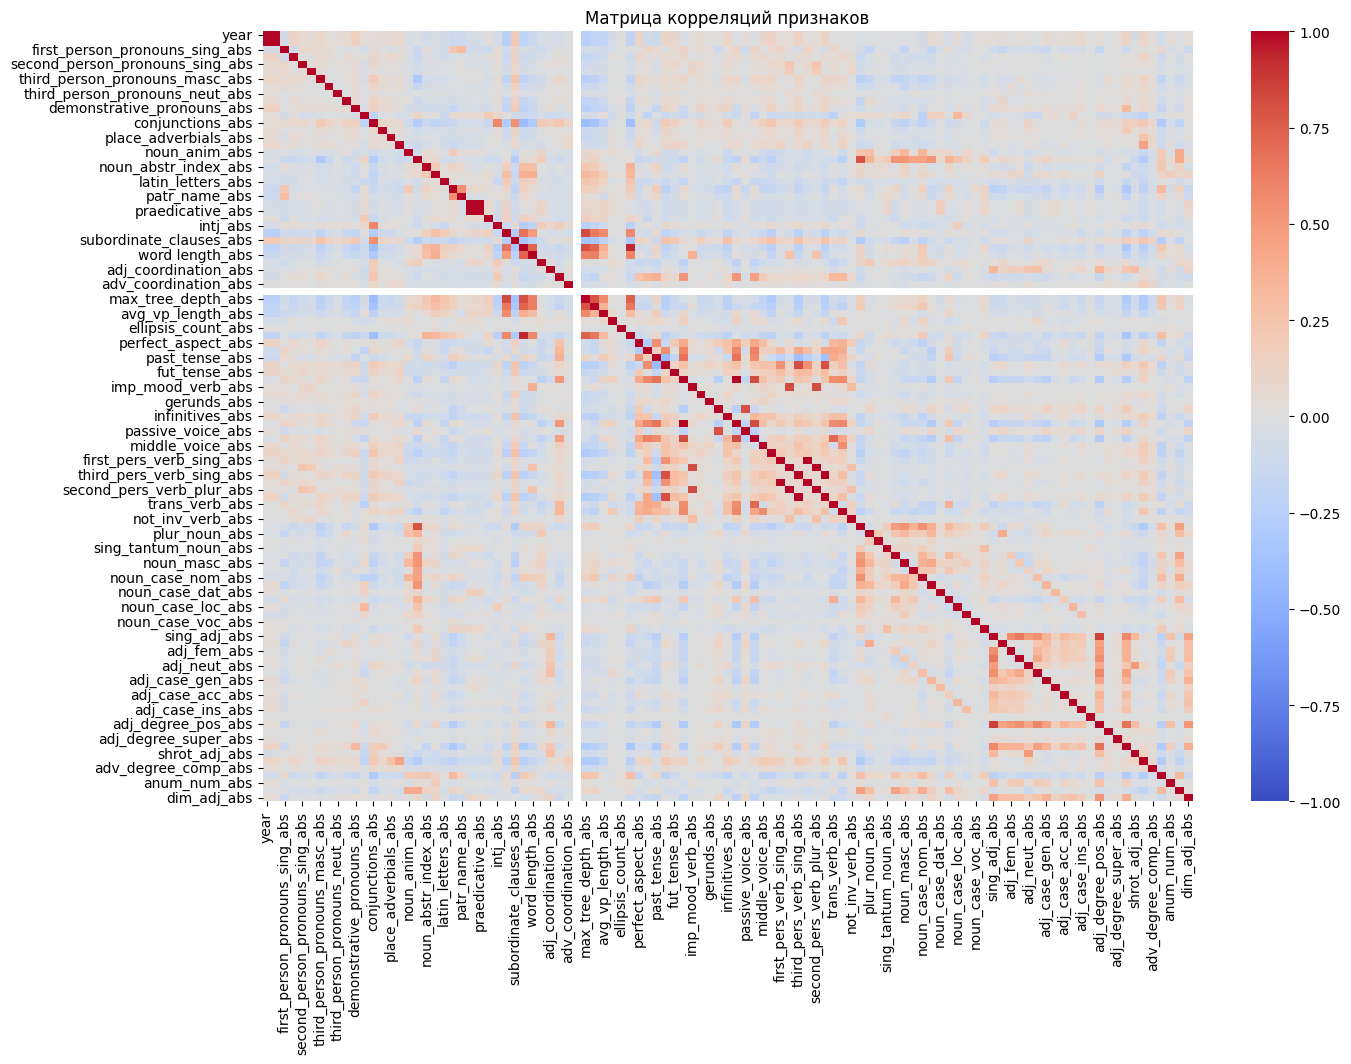

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Вычисляем корреляционную матрицу
corr_matrix = normalized_feature_matrix.corr(numeric_only=True)

# Визуализация
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляций признаков')
plt.show()

In [15]:
# 1. Сначала создаем копию normalized_feature_matrix:
fa_matrix = normalized_feature_matrix.copy(deep=True)

# 3. Дропаем столбец 'Год'
fa_matrix = fa_matrix.drop('year', axis=1)

fa_matrix.head()


,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.0,0.0,0.0,2.830,0.943,0.0,0.000,...,0.000,0.0,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.0,0.0,0.0,5.333,0.000,0.0,0.000,...,0.000,0.0,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.0,0.0,0.0,2.941,2.941,0.0,2.941,...,5.882,0.0,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.0,0.0,0.0,6.667,0.000,0.0,2.222,...,0.000,0.0,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.0,0.0,0.0,0.000,4.167,0.0,0.000,...,0.000,0.0,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000


In [16]:
# Выбираем только числовые признаки (исключаем метаданные)
feature_columns = [col for col in fa_matrix.columns if col not in ['text', 'decade']]

# Создаем DataFrame только с признаками для факторного анализа
analysis_df = fa_matrix[feature_columns].copy(deep=True)

# Убедимся, что все данные числовые
print(analysis_df.dtypes)

first_person_pronouns_sing_abs     float64
first_person_pronouns_plur_abs     float64
second_person_pronouns_sing_abs    float64
second_person_pronouns_plur_abs    float64
third_person_pronouns_masc_abs     float64
                                    ...   
adv_degree_comp_abs                float64
quant_num_abs                      float64
anum_num_abs                       float64
dim_nouns_abs                      float64
dim_adj_abs                        float64
Length: 103, dtype: object


In [50]:
analysis_df

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,0.472,0.000,0.0,0.000,2.830,0.943,0.0,0.000,0.943,9.906,...,0.000,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,2.667,0.000,0.0,0.000,5.333,0.000,0.0,0.000,1.333,5.333,...,0.000,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,0.000,0.000,0.0,0.000,2.941,2.941,0.0,2.941,0.000,5.882,...,5.882,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,2.222,0.000,0.0,0.000,6.667,0.000,0.0,2.222,0.000,4.444,...,0.000,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,0.000,0.000,0.0,0.000,0.000,4.167,0.0,0.000,4.167,4.167,...,0.000,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2.730,0.000,0.0,0.000,2.048,0.683,0.0,0.683,1.365,9.215,...,0.000,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119
19139,1.744,0.581,0.0,0.581,1.163,0.581,0.0,0.581,0.581,10.465,...,0.000,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744
19140,0.000,0.000,0.0,0.000,1.786,0.000,0.0,0.000,1.786,14.286,...,0.000,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000
19141,0.637,1.274,0.0,0.637,0.637,0.000,0.0,0.000,0.000,12.102,...,0.000,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637


In [51]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42656 sha256=6fdf49d739d7e95054ebb5a3efec6d13acf0e02c95d7c7f9744b06248cae3b6d
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [17]:
# Находим столбцы, содержащие inf
inf_cols = analysis_df.columns[~np.isfinite(analysis_df).any()]
print("Столбцы, содержащие inf:", inf_cols)

df_with_inf = analysis_df[inf_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один inf
rows_with_inf = (~np.isfinite(df_with_inf)).any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_inf.sum())

nan_cols = analysis_df.columns[analysis_df.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = analysis_df[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())

for col in nan_cols:
    analysis_df[col] = analysis_df[col].fillna(0).astype('float64')


print(analysis_df.isnull().sum())

Столбцы, содержащие inf: Index([], dtype='object')
0
Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')
2818
first_person_pronouns_sing_abs     0
first_person_pronouns_plur_abs     0
second_person_pronouns_sing_abs    0
second_person_pronouns_plur_abs    0
third_person_pronouns_masc_abs     0
                                  ..
adv_degree_comp_abs                0
quant_num_abs                      0
anum_num_abs                       0
dim_nouns_abs                      0
dim_adj_abs                        0
Length: 103, dtype: int64


In [18]:
nan_cols = analysis_df.columns[analysis_df.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

df_with_nan = analysis_df[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())


Столбцы, содержащие NaN: Index([], dtype='object')
0


In [54]:
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

other_coordination_abs    0.0
dtype: float64


In [55]:
analysis_df = analysis_df.drop('other_coordination_abs', axis=1)
stddevs = analysis_df.std()
print(stddevs[stddevs == 0])

Series([], dtype: float64)


In [56]:
feature_columns_new = [col for col in analysis_df.columns]
len(feature_columns_new)

102

In [57]:
from factor_analyzer import FactorAnalyzer

# Инициализация PFA без вращения
fa = FactorAnalyzer(n_factors=len(feature_columns), rotation=None, method='principal')

# Подгонка модели
fa.fit(analysis_df[feature_columns_new])

# Собственные значения
ev, _ = fa.get_eigenvalues()

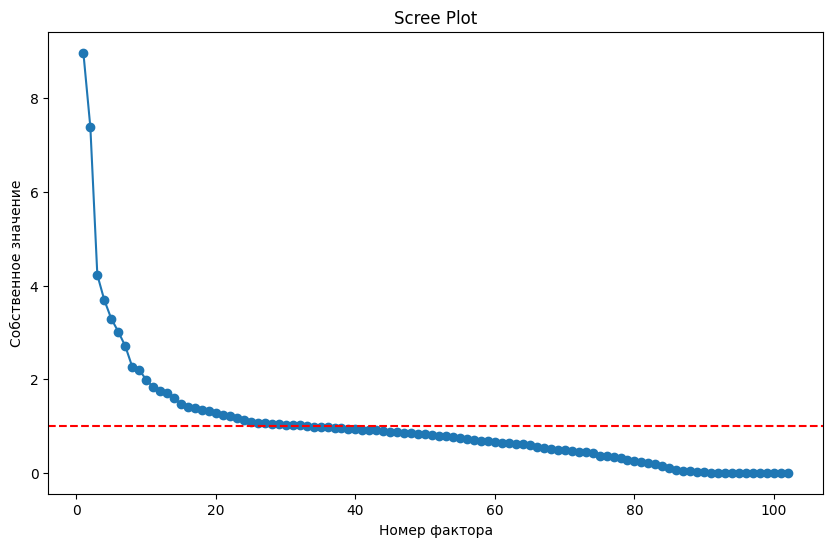

    Factor  Eigenvalue  % of Variance  Cumulative %
0        1    8.973971       8.798011      8.798011
1        2    7.381180       7.236451     16.034462
2        3    4.226428       4.143557     20.178019
3        4    3.689297       3.616958     23.794977
4        5    3.290235       3.225720     27.020697
5        6    3.014722       2.955610     29.976307
6        7    2.707172       2.654090     32.630397
7        8    2.266246       2.221810     34.852207
8        9    2.193599       2.150587     37.002794
9       10    1.991823       1.952768     38.955562
10      11    1.825256       1.789467     40.745029


In [58]:
# График осыпи
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(ev)+1), ev)
plt.plot(range(1, len(ev)+1), ev)
plt.title('Scree Plot')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.axhline(y=1, color='r', linestyle='--')
plt.show()

# Таблица собственных значений и доли дисперсии
eigenvalues_table = pd.DataFrame({
    'Factor': range(1, len(ev)+1),
    'Eigenvalue': ev,
    '% of Variance': (ev / ev.sum()) * 100,
    'Cumulative %': (ev.cumsum() / ev.sum()) * 100
})

print(eigenvalues_table.head(11))  # Пример для первых 11 факторов, как у Байбера

In [59]:
# Инициализация модели с 9 факторами
fa_promax = FactorAnalyzer(n_factors=9, rotation='promax', method='principal')
fa_promax.fit(analysis_df[feature_columns_new])

# Факторные нагрузки
loadings = pd.DataFrame(
    fa_promax.loadings_,
    columns=[f'Factor {i+1}' for i in range(9)],
    index=feature_columns_new
)

# Сохраняем нагрузки в CSV
loadings.to_csv('factor_loadings.csv')

In [60]:
# Выводим значимые нагрузки 
significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)
# significant_loadings.dropna(how='all')

for factor in significant_loadings.columns:
    print(f'Нагрузки для {factor}:')

    # Берём нагрузки для текущего фактора и исключаем NaN
    for feature, loading in significant_loadings[factor].items():
        if not pd.isna(loading):
            print(f'  - {feature}: {loading}')
    print()

Нагрузки для Factor 1:
  - conjunctions_abs: -0.5150175530110099
  - latin_letters_abs: 0.31009120131754847
  - intj_abs: -0.40009316056410665
  - mean_sentence_length_abs: 0.8695495852792291
  - subordinate_clauses_abs: -0.345133727797501
  - type-token ratio_abs: 0.9892841198168025
  - word length_abs: 0.8736197948115085
  - max_tree_depth_abs: 0.9759829459860297
  - avg_np_length_abs: 0.8656489268774517
  - avg_vp_length_abs: 0.6240113094328096
  - flesch_kincaid_index_abs: 0.8868648675769261

Нагрузки для Factor 2:
  - adj_coordination_abs: 0.4374202697020417
  - sing_adj_abs: 0.9543564515255003
  - adj_fem_abs: 0.5677926406143178
  - adj_masc_abs: 0.6229335108035745
  - adj_neut_abs: 0.4112701790028399
  - adj_case_nom_abs: 0.6716455619922812
  - adj_case_gen_abs: 0.33247446534090397
  - adj_case_acc_abs: 0.3806990008892158
  - adj_degree_pos_abs: 0.9298980397919983
  - full_adj_abs: 0.6667217179886824
  - anum_num_abs: 0.3396358711118011
  - dim_adj_abs: 0.5219185124561864

Нагру

/tmp/ipykernel_31/2351366798.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  significant_loadings = loadings.applymap(lambda x: x if abs(x) > 0.3 else None)


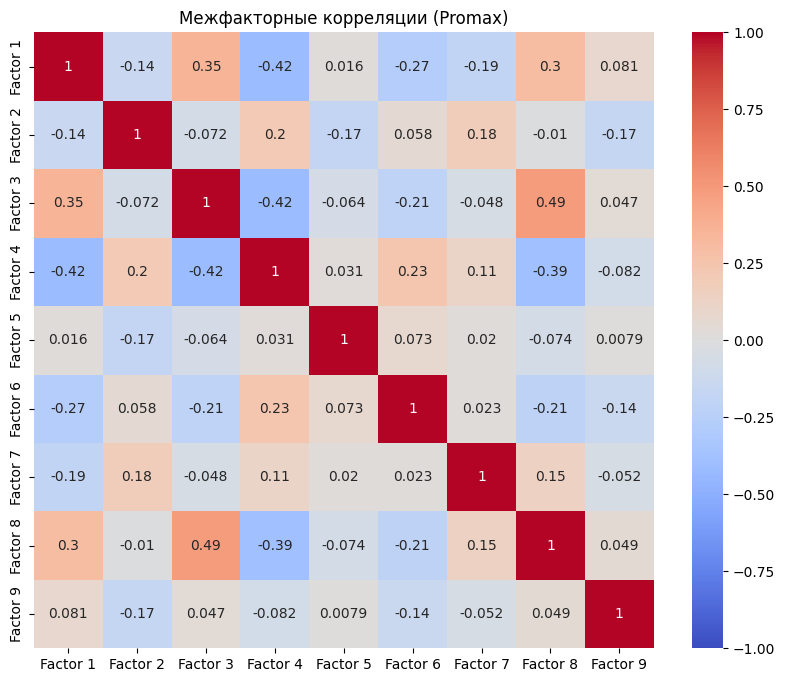

In [61]:
# Получаем факторные корреляции
factor_corr = pd.DataFrame(
    fa_promax.phi_,
    columns=[f'Factor {i+1}' for i in range(9)],
    index=[f'Factor {i+1}' for i in range(9)]
)

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(factor_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Межфакторные корреляции (Promax)')
plt.show()

In [62]:
import pandas as pd
import numpy as np

# Порог значимости для включения признаков
threshold = 0.30

# Находим абсолютные нагрузки
loadings_abs = loadings.abs()

# Индексы факторов с максимальной нагрузкой для каждого признака
max_index = loadings_abs.idxmax(axis=1)

# Создаем словарь для хранения признаков по факторам
factor_dict = {}

# Заполняем словарь, выбирая только те нагрузки, которые выше порога
for feature in loadings.index:
    factor = max_index[feature]
    max_loading = loadings_abs.loc[feature, factor]

    if max_loading > threshold:
        if factor not in factor_dict:
            factor_dict[factor] = []
        factor_dict[factor].append([feature, float(loadings.loc[feature, factor])])

factor_dict


{'Factor 7': [['first_person_pronouns_sing_abs', -0.4293802122752675],
  ['propr_name_abs', -0.5451855138340634],
  ['patr_name_abs', -0.4491720095467737],
  ['participles_abs', 0.5881032283864053],
  ['passive_voice_abs', 0.577681118844777],
  ['plur_adj_abs', 0.3282429937657002]],
 'Factor 3': [['third_person_pronouns_masc_abs', -0.31268319040334547],
  ['noun_anim_abs', 0.3842267392008957],
  ['noun_inan_abs', 0.9344982598043882],
  ['geo_name_abs', -0.30929053321057953],
  ['sing_noun_abs', 0.8700280970505678],
  ['plur_noun_abs', 0.5176580083294553],
  ['noun_fem_abs', 0.726918015730739],
  ['noun_masc_abs', 0.5618359429446571],
  ['noun_neut_abs', 0.4472570784599453],
  ['noun_case_nom_abs', 0.7092874830123158],
  ['noun_case_gen_abs', 0.47032122330767634],
  ['noun_case_acc_abs', 0.4912663890305537],
  ['quant_num_abs', 0.4848677272520284],
  ['dim_nouns_abs', 0.7575535374546926]],
 'Factor 1': [['conjunctions_abs', -0.5150175530110099],
  ['latin_letters_abs', 0.310091201317548

## Factor scores

In [63]:
normalized_feature_matrix

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.000,0.0,0.000,2.830,0.943,0.0,...,0.000,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.000,0.0,0.000,5.333,0.000,0.0,...,0.000,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.000,0.0,0.000,2.941,2.941,0.0,...,5.882,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.000,0.0,0.000,6.667,0.000,0.0,...,0.000,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.000,0.0,0.000,0.000,4.167,0.0,...,0.000,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,2.730,0.000,0.0,0.000,2.048,0.683,0.0,...,0.000,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,1.744,0.581,0.0,0.581,1.163,0.581,0.0,...,0.000,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0.000,0.000,0.0,0.000,1.786,0.000,0.0,...,0.000,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,0.637,1.274,0.0,0.637,0.637,0.000,0.0,...,0.000,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637


In [64]:
nan_cols = normalized_feature_matrix.columns[normalized_feature_matrix.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)



Столбцы, содержащие NaN: Index(['noun_abstr_index_abs', 'adj_abstr_index_abs'], dtype='object')


In [65]:
df_with_nan = normalized_feature_matrix[nan_cols]

# 3. Создаем булеву маску, где True соответствует строкам, содержащим хотя бы один NaN
rows_with_nan = df_with_nan.isnull().any(axis=1)

# 4. Считаем количество строк, содержащих хотя бы один NaN
print(rows_with_nan.sum())

2818


In [66]:
for col in nan_cols:
    normalized_feature_matrix[col] = analysis_df[col].fillna(0).astype('float64')


nan_cols = normalized_feature_matrix.columns[normalized_feature_matrix.isnull().any()]
print("Столбцы, содержащие NaN:", nan_cols)

Столбцы, содержащие NaN: Index([], dtype='object')


In [67]:
standardized_feature_matrix  = normalized_feature_matrix.copy()
standardized_feature_matrix

,year,text,decade,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,1900,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.472,0.000,0.0,0.000,2.830,0.943,0.0,...,0.000,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,1900,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,2.667,0.000,0.0,0.000,5.333,0.000,0.0,...,0.000,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,1900,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.000,0.000,0.0,0.000,2.941,2.941,0.0,...,5.882,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,1900,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.222,0.000,0.0,0.000,6.667,0.000,0.0,...,0.000,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,1900,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,0.000,0.000,0.0,0.000,0.000,4.167,0.0,...,0.000,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2005,По «Свободе» в своей программе Шендерович два...,2000,2.730,0.000,0.0,0.000,2.048,0.683,0.0,...,0.000,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119
19139,2005,"Фет, которого перечитывал три недели назад, п...",2000,1.744,0.581,0.0,0.581,1.163,0.581,0.0,...,0.000,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744
19140,2005,"По «Свободе» сказали, что Томас Манн был горд...",2000,0.000,0.000,0.0,0.000,1.786,0.000,0.0,...,0.000,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000
19141,2005,Как влиятельно все же массовое искусство. По ...,2000,0.637,1.274,0.0,0.637,0.637,0.000,0.0,...,0.000,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637


In [68]:
standardized_feature_matrix  = standardized_feature_matrix .drop(['text', 'year', 'decade'], axis=1)
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,0.472,0.000,0.0,0.000,2.830,0.943,0.0,0.000,0.943,9.906,...,0.000,0.000,16.981,0.943,2.358,0.000,0.472,0.000,9.906,2.830
1,2.667,0.000,0.0,0.000,5.333,0.000,0.0,0.000,1.333,5.333,...,0.000,0.000,18.667,1.333,4.000,0.000,2.667,1.333,6.667,0.000
2,0.000,0.000,0.0,0.000,2.941,2.941,0.0,2.941,0.000,5.882,...,5.882,0.000,23.529,0.000,0.000,0.000,0.000,0.000,0.000,2.941
3,2.222,0.000,0.0,0.000,6.667,0.000,0.0,2.222,0.000,4.444,...,0.000,0.000,13.333,4.444,6.667,2.222,2.222,0.000,2.222,4.444
4,0.000,0.000,0.0,0.000,0.000,4.167,0.0,0.000,4.167,4.167,...,0.000,0.000,12.500,0.000,0.000,0.000,0.000,0.000,8.333,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,2.730,0.000,0.0,0.000,2.048,0.683,0.0,0.683,1.365,9.215,...,0.000,0.000,16.382,3.413,5.461,0.000,1.706,0.341,5.461,5.119
19139,1.744,0.581,0.0,0.581,1.163,0.581,0.0,0.581,0.581,10.465,...,0.000,0.581,11.047,1.163,9.884,0.000,2.907,0.000,2.907,1.744
19140,0.000,0.000,0.0,0.000,1.786,0.000,0.0,0.000,1.786,14.286,...,0.000,0.000,5.357,5.357,1.786,0.000,1.786,0.000,3.571,0.000
19141,0.637,1.274,0.0,0.637,0.637,0.000,0.0,0.000,0.000,12.102,...,0.000,0.000,11.465,0.000,6.369,0.000,0.637,1.274,1.911,0.637


In [69]:
for column in standardized_feature_matrix.columns:
    mean = descriptive_stats.loc[column, 'mean']
    std = descriptive_stats.loc[column, 'std']

    standardized_feature_matrix[column] = (standardized_feature_matrix[column] - mean) / std
standardized_feature_matrix

,first_person_pronouns_sing_abs,first_person_pronouns_plur_abs,second_person_pronouns_sing_abs,second_person_pronouns_plur_abs,third_person_pronouns_masc_abs,third_person_pronouns_fem_abs,third_person_pronouns_neut_abs,third_person_pronouns_plur_abs,demonstrative_pronouns_abs,prepositions_abs,...,adj_degree_comp_abs,adj_degree_super_abs,full_adj_abs,shrot_adj_abs,adv_degree_pos_abs,adv_degree_comp_abs,quant_num_abs,anum_num_abs,dim_nouns_abs,dim_adj_abs
0,-0.584645,-0.528616,-0.195212,-0.172700,1.243373,0.613679,-0.123289,-0.470322,0.250394,-0.252348,...,-0.254019,-0.196391,0.738346,-0.127103,-0.959426,-0.392667,-0.510587,-0.324884,0.632792,0.460886
1,0.416179,-0.528616,-0.195212,-0.172700,2.899983,-0.390067,-0.123289,-0.470322,0.631489,-1.268754,...,-0.254019,-0.196391,1.027900,0.096953,-0.592197,-0.392667,-0.075786,0.863220,-0.047135,-0.824516
2,-0.799856,-0.528616,-0.195212,-0.172700,1.316838,2.740384,-0.123289,3.247850,-0.671074,-1.146732,...,10.855039,-0.196391,1.862900,-0.668860,-1.486787,-0.392667,-0.604084,-0.324884,-1.446662,0.511303
3,0.213279,-0.528616,-0.195212,-0.172700,3.782891,-0.390067,-0.123289,2.338851,-0.671074,-1.466345,...,-0.254019,-0.196391,0.111838,1.884235,0.004270,3.125901,-0.163935,-0.324884,-0.980223,1.193974
4,-0.799856,-0.528616,-0.195212,-0.172700,-0.629662,4.045360,-0.123289,-0.470322,3.400779,-1.527912,...,-0.254019,-0.196391,-0.031221,-0.668860,-1.486787,-0.392667,-0.604084,-0.324884,0.302590,-0.824516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19138,0.444904,-0.528616,-0.195212,-0.172700,0.725806,0.336930,-0.123289,0.393164,0.662759,-0.405931,...,-0.254019,-0.196391,0.635474,1.291921,-0.265449,-0.392667,-0.266148,-0.020951,-0.300297,1.500562
19139,-0.004669,-0.052137,-0.195212,1.237294,0.140069,0.228360,-0.123289,0.264210,-0.103340,-0.128103,...,-0.254019,1.807037,-0.280760,-0.000712,0.723744,-0.392667,-0.028245,-0.324884,-0.836429,-0.032381
19140,-0.799856,-0.528616,-0.195212,-0.172700,0.552402,-0.390067,-0.123289,-0.470322,1.074146,0.721161,...,-0.254019,-0.196391,-1.257961,2.408757,-1.087353,-0.392667,-0.250301,-0.324884,-0.697043,-0.824516
19141,-0.509412,0.516193,-0.195212,1.373197,-0.208064,-0.390067,-0.123289,-0.470322,-0.671074,0.235740,...,-0.254019,-0.196391,-0.208972,-0.668860,-0.062377,-0.392667,-0.477902,0.810634,-1.045508,-0.535187


In [70]:
standardized_feature_matrix = standardized_feature_matrix.drop('other_coordination_abs', axis=1)
stddevs = standardized_feature_matrix.std()
print(stddevs[stddevs == 0])

Series([], dtype: float64)


In [71]:
# Среднее после стандартизации должно быть ~0
print(standardized_feature_matrix[feature_columns_new].mean().round(2))  

# Стандартное отклонение должно быть ~1
print(standardized_feature_matrix[feature_columns_new].std().round(2))   

first_person_pronouns_sing_abs    -0.0
first_person_pronouns_plur_abs     0.0
second_person_pronouns_sing_abs    0.0
second_person_pronouns_plur_abs    0.0
third_person_pronouns_masc_abs     0.0
                                  ... 
adv_degree_comp_abs                0.0
quant_num_abs                      0.0
anum_num_abs                       0.0
dim_nouns_abs                      0.0
dim_adj_abs                        0.0
Length: 102, dtype: float64
first_person_pronouns_sing_abs     1.0
first_person_pronouns_plur_abs     1.0
second_person_pronouns_sing_abs    1.0
second_person_pronouns_plur_abs    1.0
third_person_pronouns_masc_abs     1.0
                                  ... 
adv_degree_comp_abs                1.0
quant_num_abs                      1.0
anum_num_abs                       1.0
dim_nouns_abs                      1.0
dim_adj_abs                        1.0
Length: 102, dtype: float64


In [72]:
# 1. Создаем DataFrame factor_scores с текстами и декадами
factor_scores = normalized_feature_matrix[['text', 'decade']].copy()

# 2. Связываем standardized_feature_matrix с factor_scores по индексам
standardized_features = standardized_feature_matrix.copy()
standardized_features.index = factor_scores.index

In [73]:
# 3. Функция для расчета факторной оценки
def calculate_factor_score(row, factor_features):
    score = 0
    for feature, loading in factor_features:
        # Получаем стандартизированное значение признака
        value = row[feature]
        # Учитываем знак нагрузки: + если loading > 0, - если loading < 0
        score += value * (1 if loading > 0 else -1)
    return score

In [74]:
# 4. Для каждого фактора из factor_dict вычисляем оценку
for factor, features in factor_dict.items():
    # Признаки и их нагрузки для текущего фактора
    factor_features = [(feat[0], feat[1]) for feat in features]

    # Проверяем наличие признаков в standardized_features
    missing = [feat[0] for feat in features if feat[0] not in standardized_features.columns]
    if missing:
        print(f"Предупреждение: Признаки {missing} отсутствуют в standardized_feature_matrix.")
        continue

    # Рассчитываем факторную оценку
    factor_scores[factor] = standardized_features.apply(
        lambda row: calculate_factor_score(row, factor_features), axis=1
    )

# 5. Проверяем результат
factor_scores.head()

,text,decade,Factor 7,Factor 3,Factor 1,Factor 8,Factor 2,Factor 5,Factor 9,Factor 4,Factor 6
0,"[Москва]<com id=""15215756731490""/> У папá...",1900,0.877794,5.549442,-2.272637,0.899488,1.419909,-10.627033,-1.338272,-1.873376,-1.037980
1,"Март, после 16-го, 1900 «У Горького, — говорил...",1900,-0.723645,-8.546502,-2.872587,2.848187,-5.475191,9.085194,0.770948,13.860774,2.475218
2,"30–31 марта 1900 Если моя жена нечестная, непо...",1900,0.130418,-11.648620,-4.932846,5.355206,1.126193,-4.165967,-0.725425,-4.283158,-1.037980
3,6 апреля 1900 Дорн в «Чайке» говорит: «Что-то ...,1900,2.912002,-12.990721,-2.535812,-0.999238,-4.811813,3.442918,-1.906540,15.538896,4.818229
4,"Май 1900 А.П. Чехов говорит, что Анна Васильев...",1900,-0.998975,-9.098258,4.225641,0.295889,-0.710609,-4.433267,-1.906540,5.589592,-1.037980


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


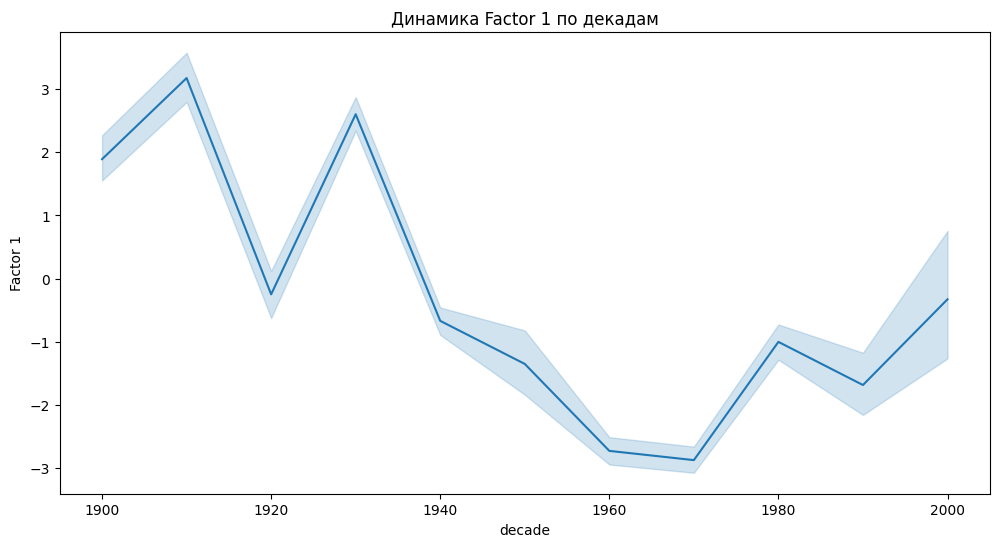

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=factor_scores, x='decade', y='Factor 1')
plt.title('Динамика Factor 1 по декадам')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

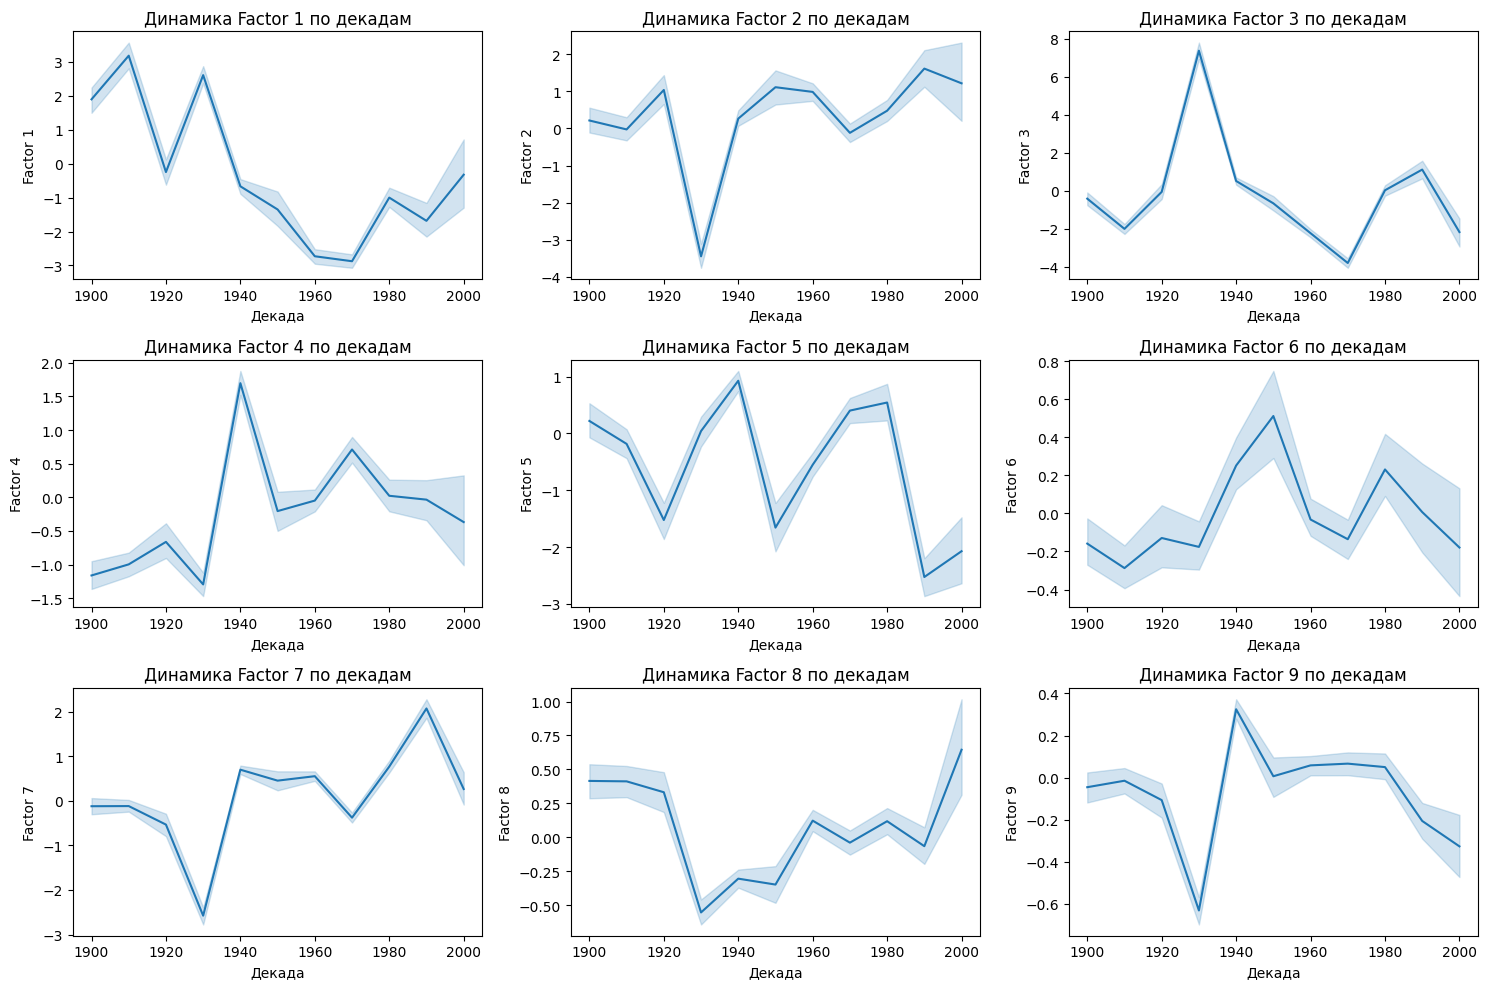

In [76]:
factors = [f'Factor {i}' for i in range(1, 10)]  # Список факторов 

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Преобразуем массив подграфиков в одномерный для удобства

# Перебираем факторы и создаем графики
for i, factor in enumerate(factors):
    sns.lineplot(data=factor_scores, x='decade', y=factor, ax=axes[i])
    axes[i].set_title(f'Динамика {factor} по декадам')
    axes[i].set_xlabel('Декада')
    axes[i].set_ylabel(factor)

plt.tight_layout()  
plt.show()


In [78]:
factor_means_by_decade = factor_scores.copy().drop(columns=['text'], errors='ignore')

# Группируем по декадам и вычисляем среднее
factor_means_by_decade = factor_means_by_decade.groupby('decade').mean()


# Выводим таблицу
factor_means_by_decade

,Factor 7,Factor 3,Factor 1,Factor 8,Factor 2,Factor 5,Factor 9,Factor 4,Factor 6
decade,,,,,,,,,
1900,-0.121859,-0.413371,1.890907,0.415913,0.215244,0.221013,-0.045848,-1.161219,-0.158606
1910,-0.118646,-2.004350,3.175945,0.412709,-0.026114,-0.182994,-0.015056,-0.996296,-0.287357
1920,-0.533988,-0.056979,-0.249611,0.332665,1.039012,-1.523031,-0.107166,-0.662375,-0.129078
1930,-2.576353,7.379393,2.603048,-0.551333,-3.451990,0.042570,-0.631888,-1.294414,-0.175886
1940,0.697255,0.517789,-0.669325,-0.302805,0.265598,0.928744,0.324793,1.696014,0.251870
1950,0.451785,-0.659683,-1.351156,-0.346340,1.113766,-1.656559,0.006252,-0.204891,0.512426
1960,0.551646,-2.232506,-2.728351,0.123801,0.986651,-0.550573,0.057991,-0.048678,-0.031913
1970,-0.378738,-3.802054,-2.874524,-0.038039,-0.118238,0.403125,0.066214,0.710768,-0.135522
1980,0.765987,0.028698,-1.002140,0.119598,0.478733,0.545191,0.049784,0.022804,0.231413


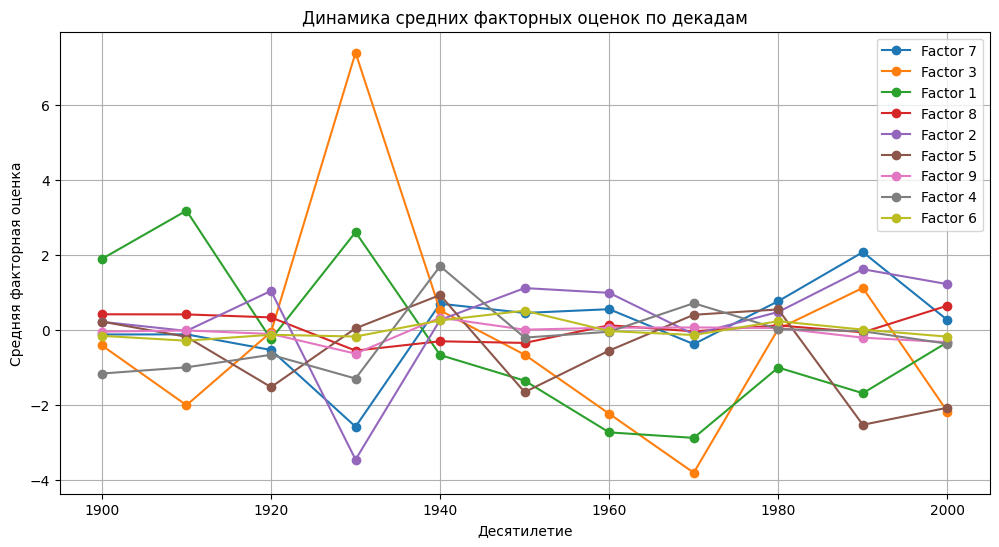

In [79]:
plt.figure(figsize=(12, 6))

# Для каждого фактора строим линию
for factor in factor_means_by_decade.columns:
    if factor.startswith('Factor'):
        plt.plot(
            factor_means_by_decade.index,
            factor_means_by_decade[factor],
            marker='o',
            label=factor
        )

plt.title('Динамика средних факторных оценок по декадам')
plt.xlabel('Десятилетие')
plt.ylabel('Средняя факторная оценка')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


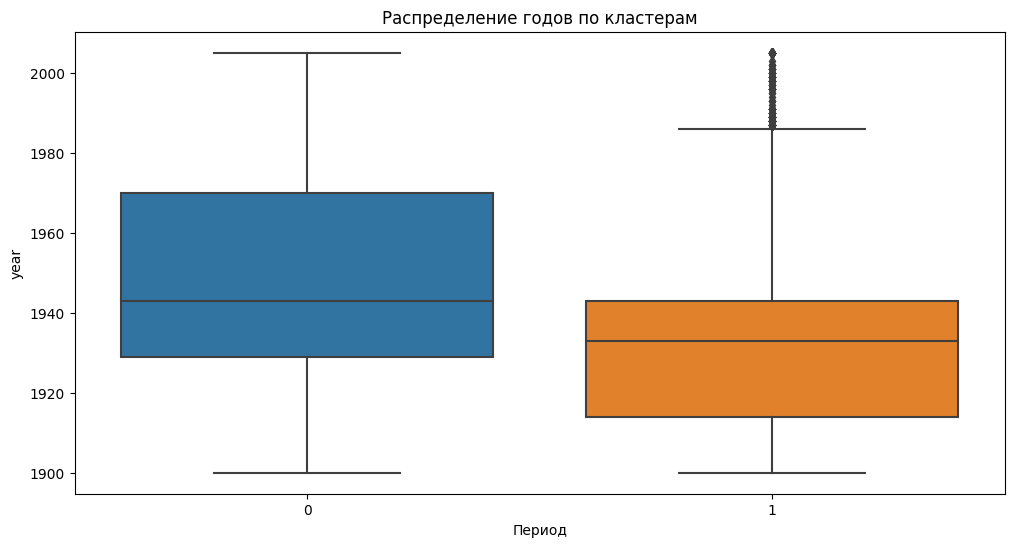

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Выделяем только факторные оценки (без года)
data_for_clustering = cluster_by_factors[[col for col in cluster_by_factors.columns if col.startswith('Factor')]]

# 2. Стандартизация
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# 4. Кластеризация с оптимальным k (например, k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
cluster_by_factors['Период'] = clusters

# 5. Визуализация по годам
plt.figure(figsize=(12, 6))
sns.boxplot(x='Период', y='year', data=cluster_by_factors)
plt.title('Распределение годов по кластерам')
plt.show()

# temporal classification

In [ ]:
factor_scores

,Текст открытки,decade,Factor 1,Factor 3,Factor 8,Factor 7,Factor 9,Factor 2,Factor 4,Factor 6,Factor 5
0,"{Милый Жоржик! Простите, голубчик, за молчание...",1900,11.177225,0.824474,-2.222890,3.229749,-0.464307,-0.043448,-2.885691,-1.557961,4.558516
1,Добрейший Паша! Будь добр вышли мне на консерв...,1910,2.749839,-1.006027,-4.420608,4.362104,2.273618,-2.504431,-6.018134,-3.529796,0.259031
2,Милая моя Олечка! Открытку твою получила. Спас...,1910,13.798344,-1.070968,-4.410506,6.022512,-1.160603,-3.670938,1.379061,-4.011744,0.452422
3,Ст. Челябинск 18/IV Христос Воскресе! От душ...,1910,9.924345,-2.798516,-5.212038,-1.466646,0.346438,-3.704034,2.070709,-0.064418,-2.145830
4,Дорогие [? Папашенька] Саша Марфуша и Ваня! По...,1900,-1.691950,3.775391,-0.754552,-6.179739,-1.160603,-3.621868,0.547746,1.172657,-2.145830
...,...,...,...,...,...,...,...,...,...,...,...
39992,Дорогие Лыткаринцы! Поздравляем с Новым годом!...,1980,10.560771,1.553140,1.580947,0.933852,-0.007248,-2.654989,-4.279227,0.519381,-2.145830
39993,"С новым годом! Милая, и дорогая, Тома. От всей...",1980,-4.578485,1.392283,1.242228,-4.648397,-1.160603,-6.838564,4.614246,-5.130673,-2.145830
39994,Дорогие мой [^мои] всех вас я поздравляю с нов...,1980,-4.030059,3.513131,-2.056847,-0.725629,-1.160603,-1.611964,4.313123,0.959671,-2.145830
39995,Тома! Сестренка ты моя Дорогая!!! От всего сер...,1980,-0.304610,1.518561,-4.428237,-1.179256,-1.160603,-6.252580,21.883171,-3.924923,-2.145830
